# Purpose

In an earlier notebook, I attemped to make a stock prediction model. This failed to say the least. However, I think there is still much to be salvaged from the attempt. Python code written for a foolish task (predicting the stock market) is not written in vain, but an ideal opportunity to learn some new skills. I had a ton of fun making the stock model, and I wanted to still show the process which ultimately is more important than the end result. After writing a ton of separate functions to act on stock data, I realized a much better approach was to make a class that could hold data and also had different functions for prediction, plotting, analysis and anything else that might be needed. Having already developed all of these functions separately, I thought it made a lot of sense to combine them into a single class. This notebook will build up the class, covering many data manipulation, plotting, and even modeling concepts in a single example! 

In [1]:
#Note: before launching Jupyter lab, need to export: export DJANGO_SETTINGS_MODULE=crypto_signal.settings
import django
django.setup()

In [2]:
from crypto_track.stocker import Stocker
import pandas as pd
import numpy as np

In [3]:
bitcoin = Stocker(ticker = 'BTC')

BTC Stocker Initialized. Data covers 2013-01-14 to 2018-12-02.


In [4]:
bitcoin.changepoint_prior_scale=0.5
start = '2017-01-04'
end = '2018-01-04'

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in BTC from 2017-01-04 to 2018-01-04 with 100 shares.

When the model predicted an increase, the price increased 63.64% of the time.
When the model predicted a  decrease, the price decreased  50.75% of the time.

The total profit using the Prophet model = $1206696.08.
The Buy and Hold strategy profit =         $1406930.91.

Thanks for playing the stock market!



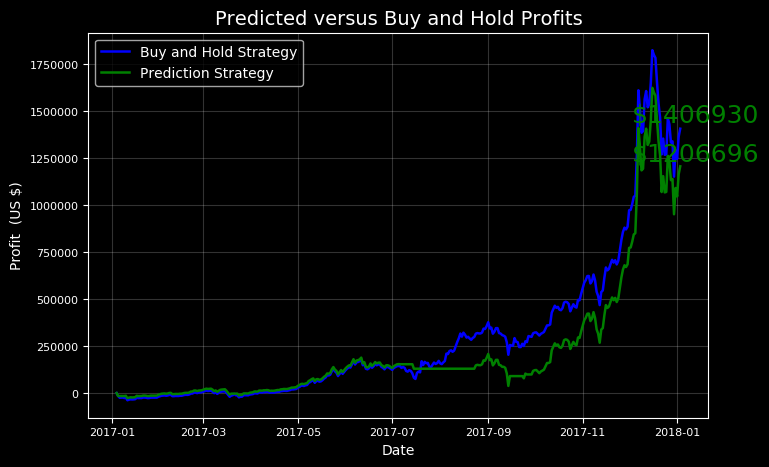

In [5]:
bitcoin.evaluate_prediction(start_date=start, end_date=end, nshares=100)

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:178: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:179: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


Maximum period_close = 19409.63 on 2017-12-16.
Minimum period_close = 14.53 on 2013-01-14.
Current period_close = 4133.07 on 2018-12-02.



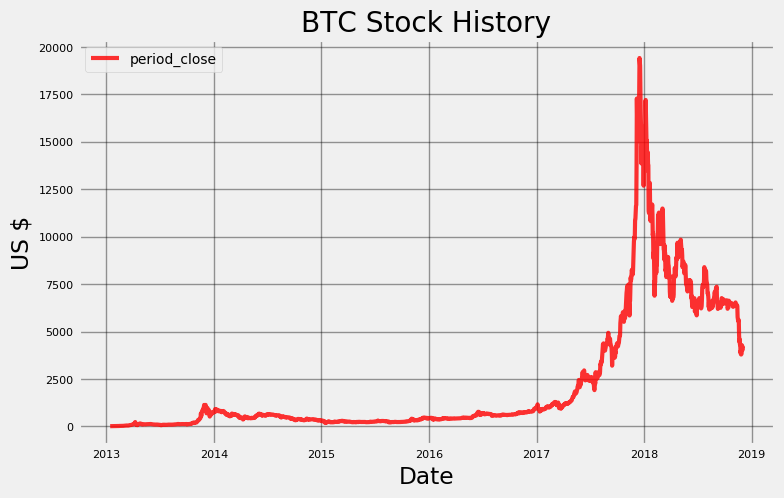

In [6]:
bitcoin.plot_stock()

/Users/lauramay/Documents/GitHub/crypto_signal/env/lib/python3.7/site-packages/pandas/core/frame.py:406: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  elif isinstance(data, collections.Iterator):



Validation Range 2016-12-02 to 2017-12-02.

     cps   train_err  train_range     test_err  test_range
0  0.001  147.634695   431.429390  2376.902559  430.978216
1  0.050   29.575795   106.333973  1900.247554  250.562159
2  0.100   26.407753    97.597044  1896.887653  432.555926
3  0.200   25.059742    93.326485  1894.422321  563.114562


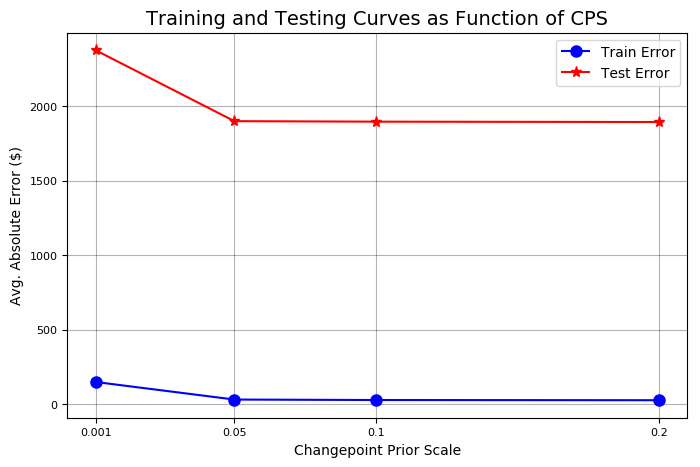

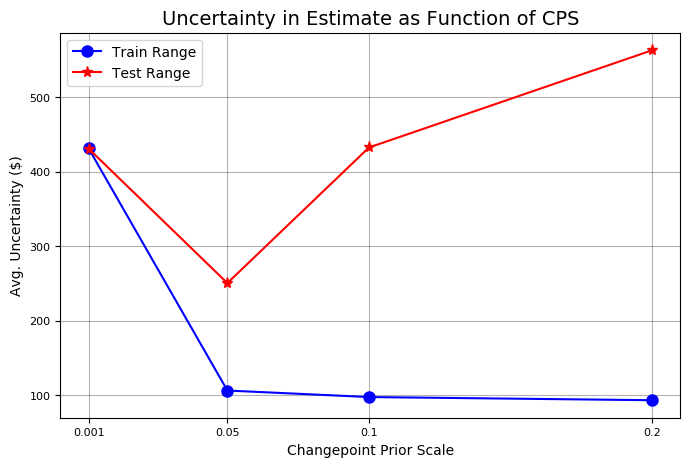

In [7]:
bitcoin.changepoint_prior_validation()

In [8]:
bitcoin.changepoint_prior_scale = 0.05

0.2

In [9]:
bitcoin.evaluate_prophet()

AttributeError: 'Stocker' object has no attribute 'evaluate_prophet'

Predicted Price on 2019-01-12 = $321.95


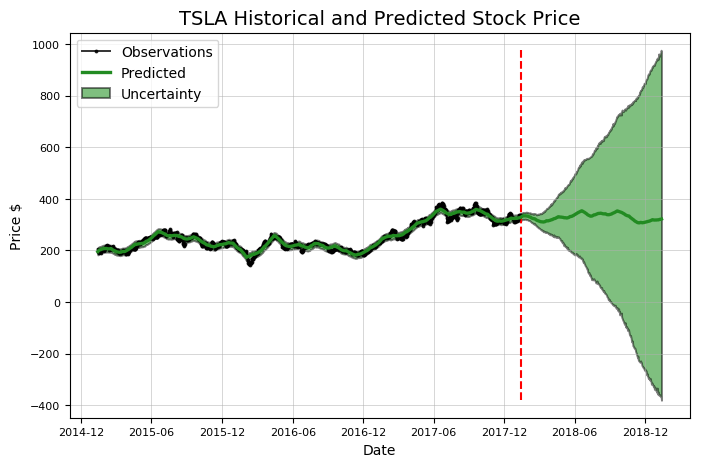

In [44]:
tesla = Stocker(ticker = 'TSLA')
model, future = tesla.prophet_model()

In [10]:
bitcoin.changepoint_prior_effect()

AttributeError: 'Stocker' object has no attribute 'changepoint_prior_effect'

In [11]:
model.plot_components(future)

NameError: name 'model' is not defined

In [35]:
micro = Stocker(ticker='MSFT')

In [12]:
model, future = bitcoin.prophet_model()

AttributeError: 'Stocker' object has no attribute 'prophet_model'

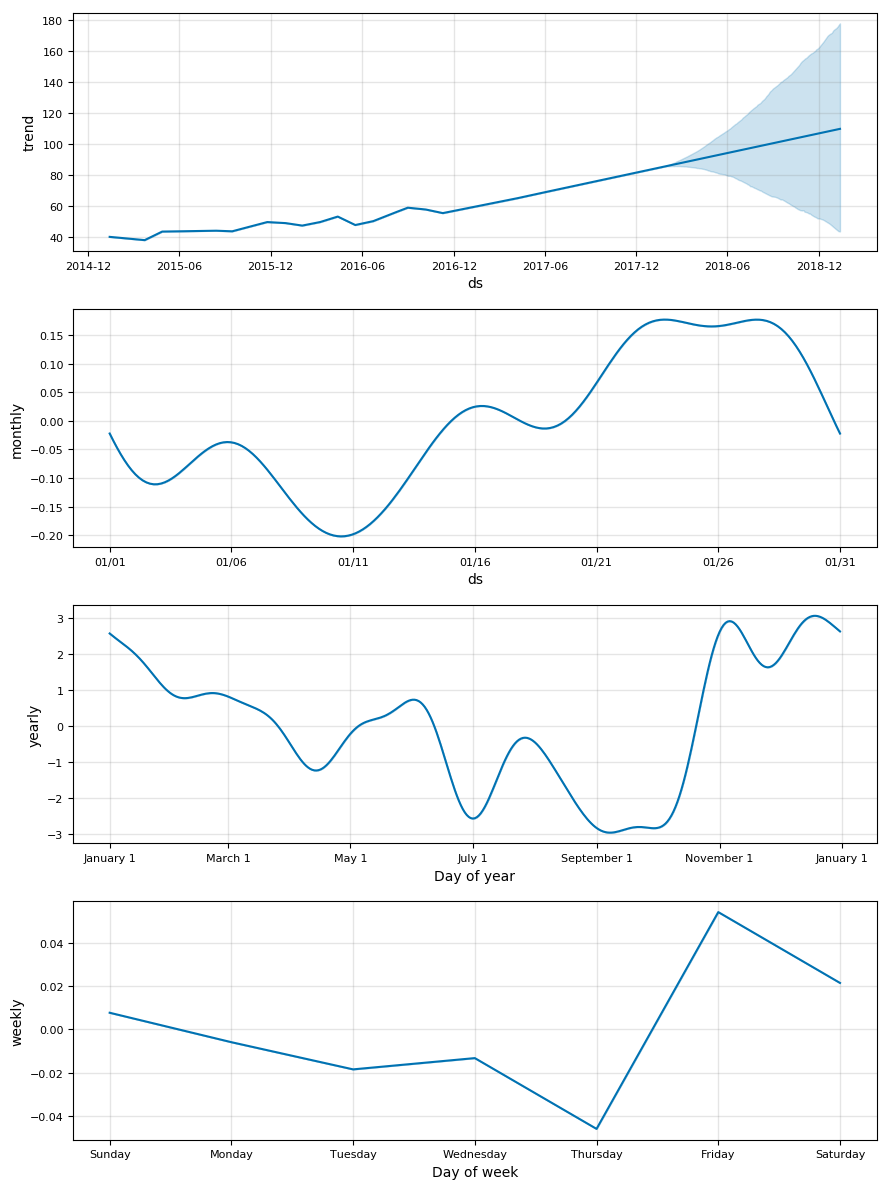

In [37]:
model.plot_components(future)

Maximum price = $89.58 on 2018-01-12.
Minimum price = $0.06 on 1986-03-24.
Current price = $89.58.


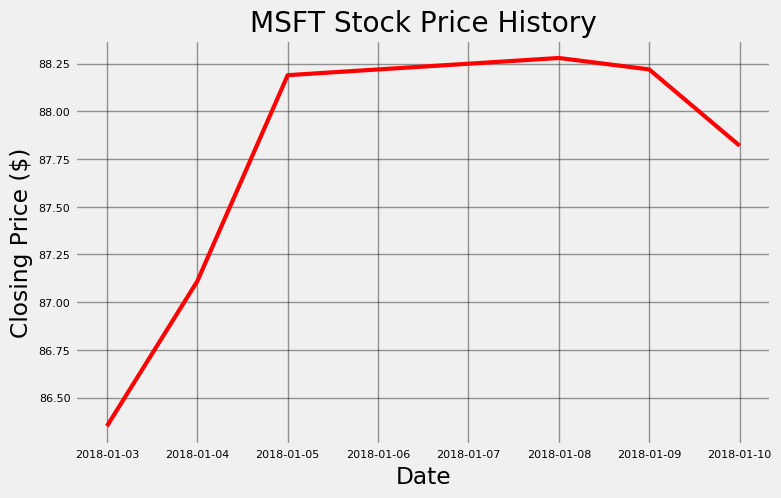

In [13]:
micro.plot_stock(start_date='2018-01-03', end_date='2018-01-10')

In [14]:
stock_msft = micro.stock

In [17]:
stock_msft.tail(10)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y
8016,2017-12-29,85.630,86.0500,85.5000,85.54,18162779.0,0.0,1.0,85.630,86.0500,85.5000,85.54,18162779.0,2017-12-29,85.54
8017,2018-01-02,86.125,86.3100,85.5000,85.95,21993101.0,0.0,1.0,86.125,86.3100,85.5000,85.95,21993101.0,2018-01-02,85.95
8018,2018-01-03,86.055,86.5100,85.9700,86.35,24173064.0,0.0,1.0,86.055,86.5100,85.9700,86.35,24173064.0,2018-01-03,86.35
8019,2018-01-04,86.590,87.6600,86.5700,87.11,21145985.0,0.0,1.0,86.590,87.6600,86.5700,87.11,21145985.0,2018-01-04,87.11
8020,2018-01-05,87.660,88.4100,87.4300,88.19,22526563.0,0.0,1.0,87.660,88.4100,87.4300,88.19,22526563.0,2018-01-05,88.19
8021,2018-01-08,88.200,88.5800,87.6046,88.28,20293930.0,0.0,1.0,88.200,88.5800,87.6046,88.28,20293930.0,2018-01-08,88.28
8022,2018-01-09,88.650,88.7272,87.8600,88.22,19390427.0,0.0,1.0,88.650,88.7272,87.8600,88.22,19390427.0,2018-01-09,88.22
8023,2018-01-10,87.860,88.1900,87.4100,87.82,18129153.0,0.0,1.0,87.860,88.1900,87.4100,87.82,18129153.0,2018-01-10,87.82
8024,2018-01-11,88.130,88.1300,87.2400,88.08,16529868.0,0.0,1.0,88.130,88.1300,87.2400,88.08,16529868.0,2018-01-11,88.08
8025,2018-01-12,88.670,89.7800,88.4500,89.58,24000439.0,0.0,1.0,88.670,89.7800,88.4500,89.58,24000439.0,2018-01-12,89.58


MSFT Total buy and hold profit from 1986-03-13 to 2018-01-12 for 1000 shares = $89521.06


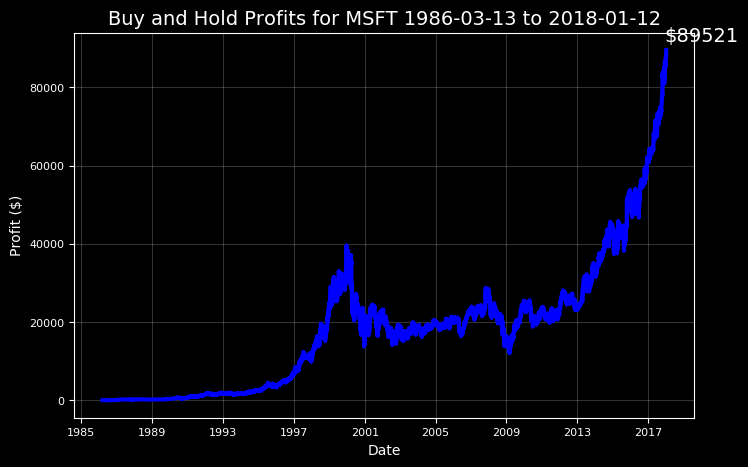

In [9]:
micro.hold_profit(nshares=1000)

In [ ]:
tesla = Stocker(ticker='TSLA')

In [ ]:
tesla.plot_stock()

In [ ]:
tesla.changepoint_prior_effect()

In [ ]:
tesla.changepoint_prior_scale = 0.1

In [ ]:
tesla.prophet_model()

In [ ]:
tesla.hold_profit()

In [ ]:
tesla.evaluate_prophet()

In [ ]:
tesla.changepoint_analysis()

In [ ]:
tesla.predict_range(days=60)

In [ ]:
cat = Stocker(ticker='WIKI/CAT')

In [ ]:
cat.plot_stock()

In [ ]:
cat.changepoint_prior_effect()